# **Часть 1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
%matplotlib inline

df = pd.read_csv("dataSP25.csv")

print("Размер датафрейма:", df.shape)
df.head()


Размер датафрейма: (27379, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Clinton Hill Apartment Single Bedroom ! Pratt ~~,30610258,Santiago,Brooklyn,Clinton Hill,40.69591,-73.96284,Private room,58,2,1,9/23/2018,0.10,1,0
1,2,Andy Phillips,6180052,Andrian,Brooklyn,Fort Greene,40.68769,-73.97490,Private room,99,5,4,9/29/2017,0.17,1,250
2,3,"Stylish, Comfortable, and Affordable in Brooklyn",5957027,Zachary,Brooklyn,Crown Heights,40.67667,-73.91750,Entire home/apt,180,2,126,6/14/2019,3.74,1,74
3,4,15 min train ride to Times Sq and US OPEN,101602599,M,Queens,Woodside,40.74340,-73.90588,Entire home/apt,50,1,95,6/24/2019,5.63,2,0
4,5,Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...,106168581,Jason,Brooklyn,South Slope,40.66600,-73.99020,Entire home/apt,210,4,88,7/4/2019,4.41,1,20


In [ ]:
target_col = 'price'

print("Распределение цены:")
print(df[target_col].describe())

print("\nЧисло значений > 1000:", (df[target_col] > 1000).sum())
print("Число значений = 0:", (df[target_col] == 0).sum())


Распределение цены:
count    27379.000000
mean       151.569561
std        219.807784
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Число значений > 1000: 129
Число значений = 0: 8


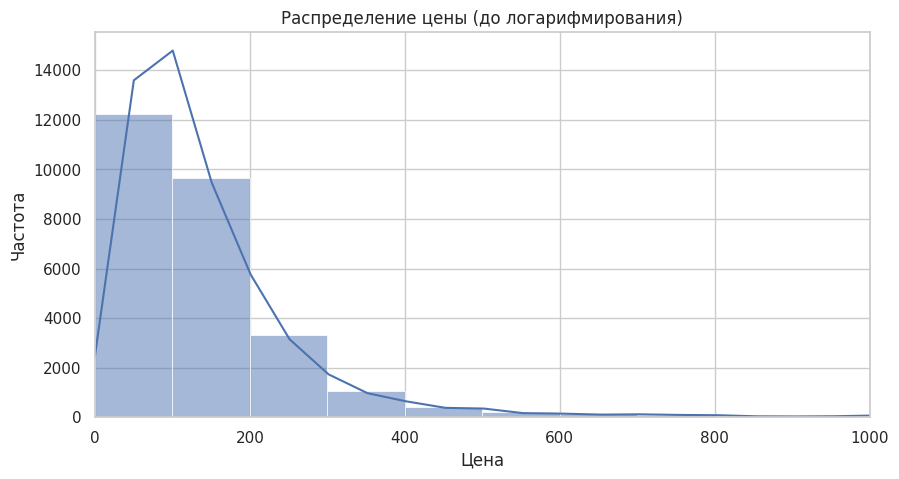

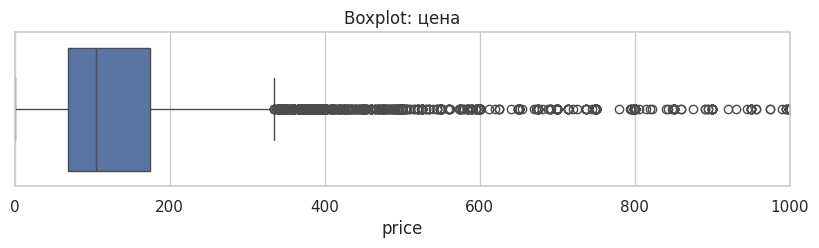

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df[target_col], bins=100, kde=True)
plt.title('Распределение цены (до логарифмирования)')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.xlim(0, 1000)
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x=target_col)
plt.title('Boxplot: цена')
plt.xlim(0, 1000)
plt.show()


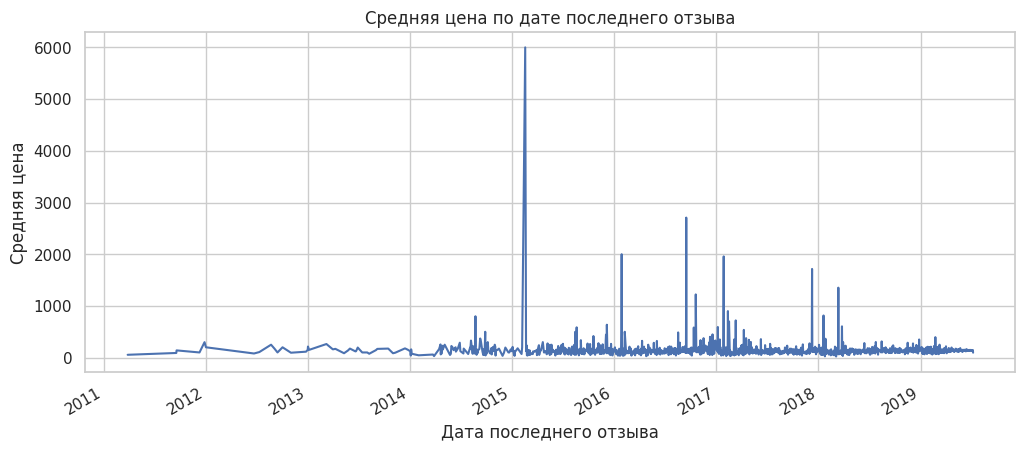

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

plt.figure(figsize=(12, 5))
df.groupby('last_review')['price'].mean().plot()
plt.title("Средняя цена по дате последнего отзыва")
plt.ylabel("Средняя цена")
plt.xlabel("Дата последнего отзыва")
plt.grid(True)
plt.show()


# 2.1 Копия и типы данных

In [ ]:
df_copy = df.copy()

In [ ]:
print("Типы данных:")
print(df_copy.dtypes)


Типы данных:
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [ ]:
cat_cols = df_copy.select_dtypes(include=['object']).columns.tolist()
num_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
date_cols = df_copy.select_dtypes(include=['datetime']).columns.tolist()

print("\nКатегориальные признаки:", cat_cols)
print("Числовые признаки:", num_cols)
print("Дата/время признаки:", date_cols)



Категориальные признаки: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
Числовые признаки: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Дата/время признаки: ['last_review']


# 2.2 Пропуски

In [ ]:
missing = df_copy.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Признаки с пропущенными значениями:")
print(missing)


Признаки с пропущенными значениями:
reviews_per_month    5633
last_review          5633
host_name              10
name                    9
dtype: int64


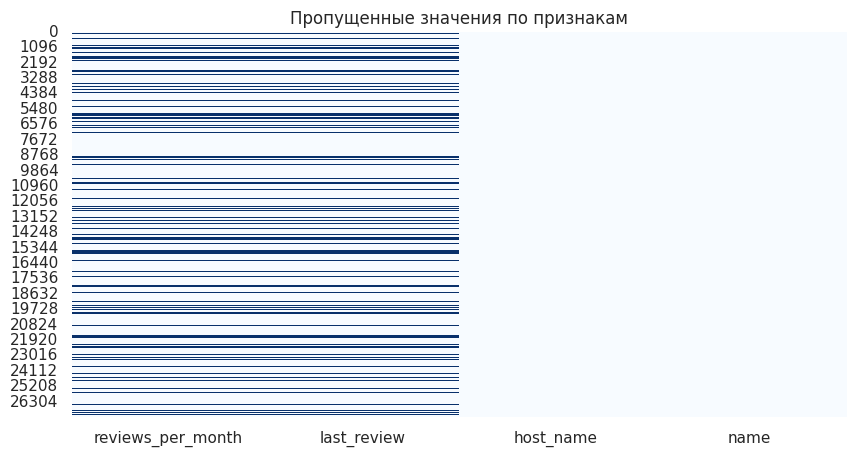

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_copy[missing.index].isnull(), cbar=False, cmap='Blues')
plt.title("Пропущенные значения по признакам")
plt.show()


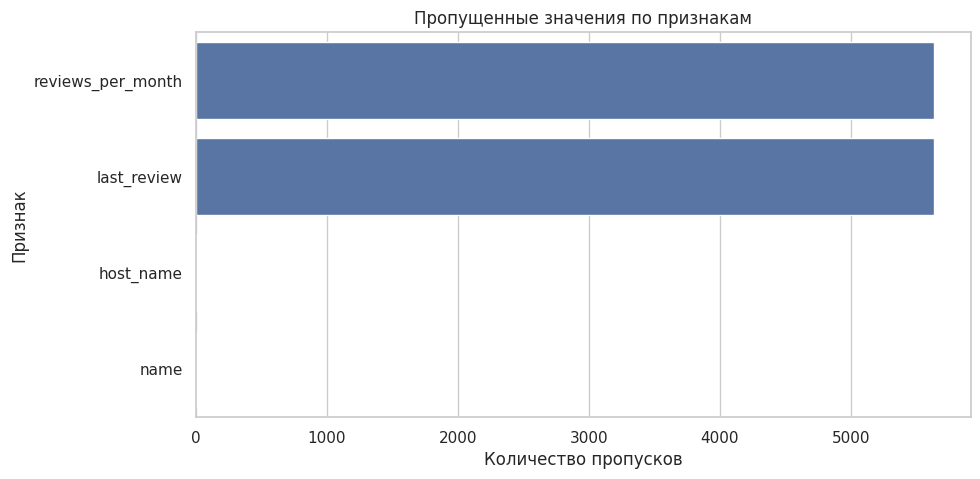

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=missing.values, y=missing.index)
plt.title('Пропущенные значения по признакам')
plt.xlabel('Количество пропусков')
plt.ylabel('Признак')
plt.show()


# 2.3 Первичный анализ числовых признаков

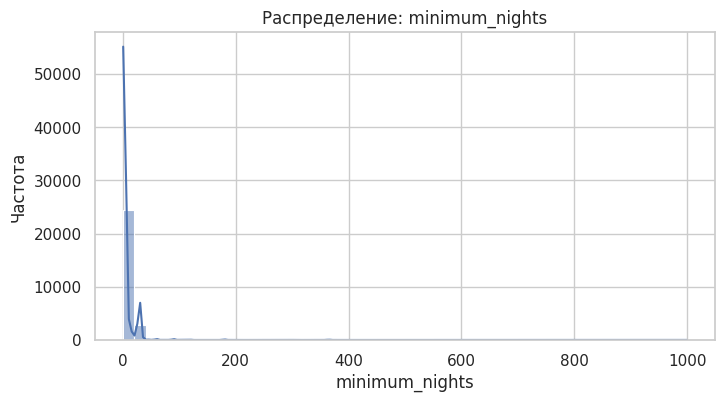

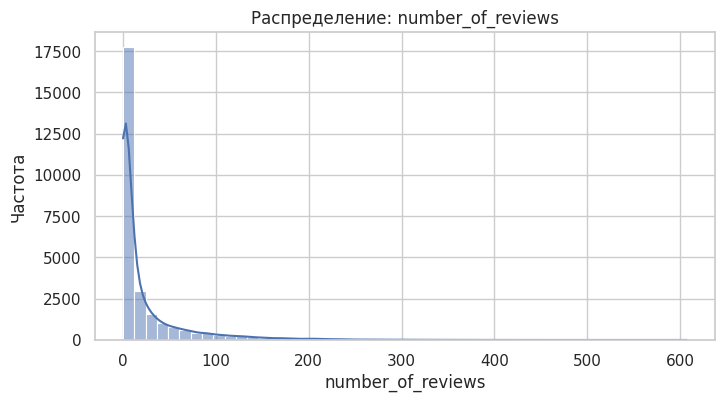

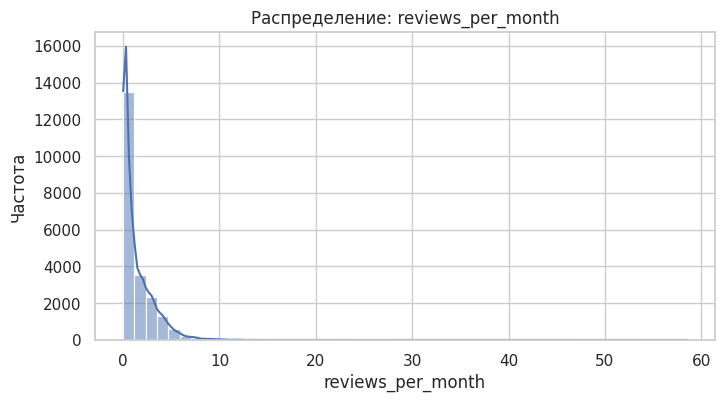

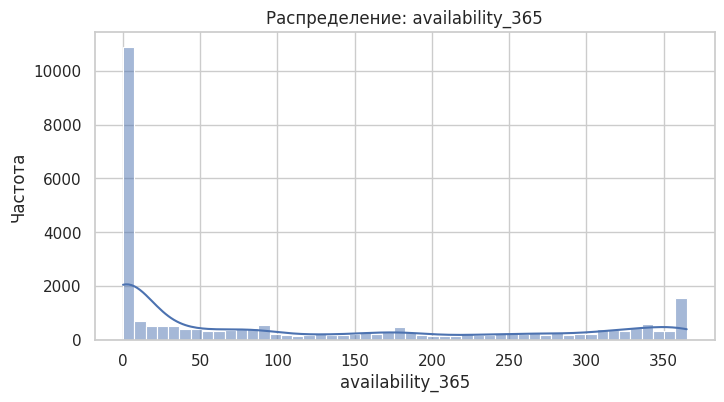

In [ ]:
cols_to_plot = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
for col in cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_copy[col], bins=50, kde=True)
    plt.title(f'Распределение: {col}')
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.show()


In [ ]:
print(df_copy[num_cols].describe())

                 id       host_id      latitude     longitude         price  \
count  27379.000000  2.737900e+04  27379.000000  27379.000000  27379.000000   
mean   13690.000000  6.820276e+07     40.728836    -73.952071    151.569561   
std     7903.780846  7.910462e+07      0.054629      0.046278    219.807784   
min        1.000000  2.438000e+03     40.506410    -74.242850      0.000000   
25%     6845.500000  7.971896e+06     40.689955    -73.983080     69.000000   
50%    13690.000000  3.114212e+07     40.723030    -73.955700    105.000000   
75%    20534.500000  1.074344e+08     40.763045    -73.935830    175.000000   
max    27379.000000  2.743213e+08     40.913060    -73.717950  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    27379.000000       27379.000000       21746.000000   
mean         7.056722          23.228131           1.383797   
std         20.194945          44.281418           1.714116   
min          1.000000           0.00

In [ ]:
print("\nminimum_nights > 365:")
print(df_copy[df_copy['minimum_nights'] > 365]['minimum_nights'].value_counts())



minimum_nights > 365:
minimum_nights
999    3
500    1
366    1
370    1
Name: count, dtype: int64


# 2.4 Преобразование и логарифмы

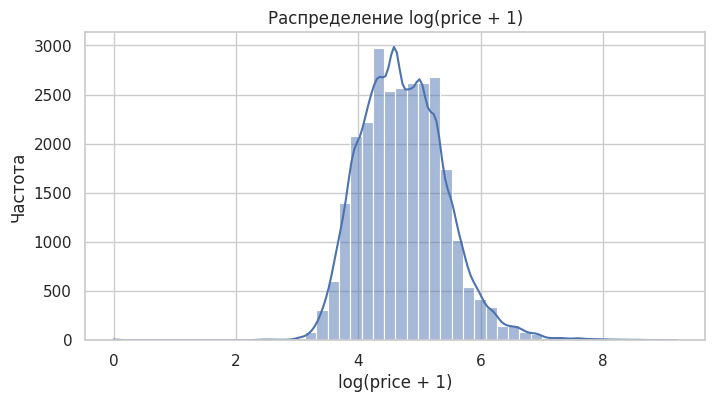

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(df_copy['price']), bins=50, kde=True)
plt.title('Распределение log(price + 1)')
plt.xlabel('log(price + 1)')
plt.ylabel("Частота")
plt.show()


# 2.5 Корреляционный анализ

In [ ]:
num_features = df_copy.select_dtypes(include=['int64', 'float64']).copy()
corr_matrix = num_features.corr()


In [ ]:
corr_with_price = corr_matrix['price'].drop('price').sort_values(ascending=False)
print("Корреляция с ценой:")
print(corr_with_price)


Корреляция с ценой:
availability_365                  0.093170
calculated_host_listings_count    0.066000
latitude                          0.037734
minimum_nights                    0.031273
host_id                           0.021544
id                                0.004022
reviews_per_month                -0.030720
number_of_reviews                -0.050133
longitude                        -0.164342
Name: price, dtype: float64


/tmp/ipython-input-3448024812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_price.values, y=corr_with_price.index, palette='coolwarm')


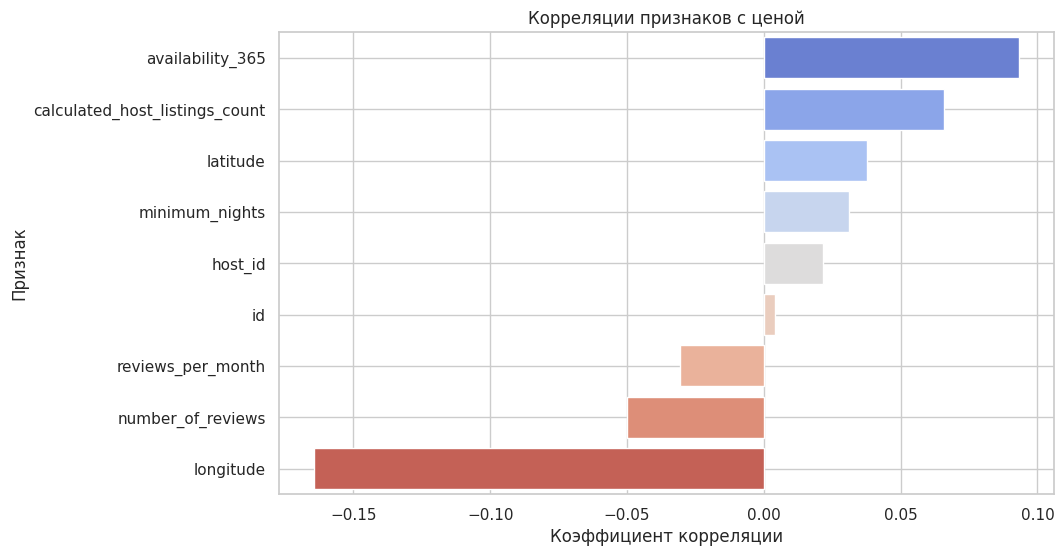

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_price.values, y=corr_with_price.index, palette='coolwarm')
plt.title("Корреляции признаков с ценой")
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Признак')
plt.grid(True)
plt.show()


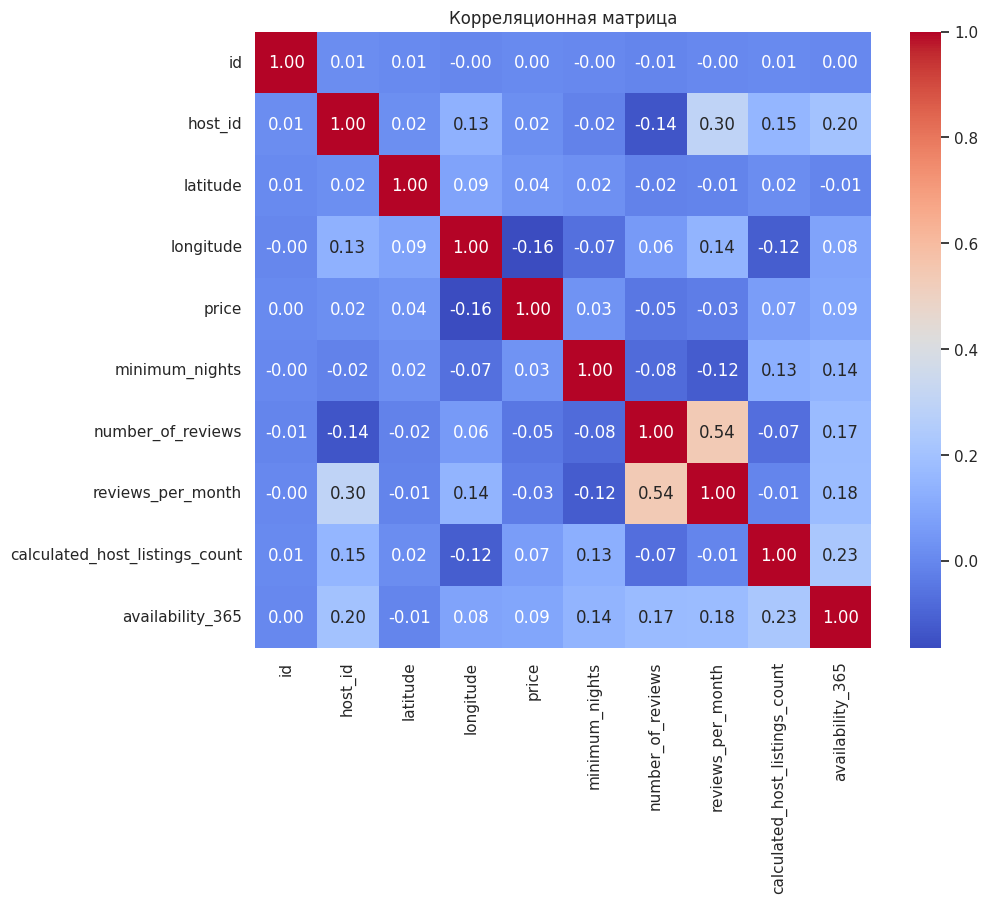

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()


# 2.6 Категориальные признаки


* Распределение в room_type:
room_type
Entire home/apt    14254
Private room       12486
Shared room          639
Name: count, dtype: int64


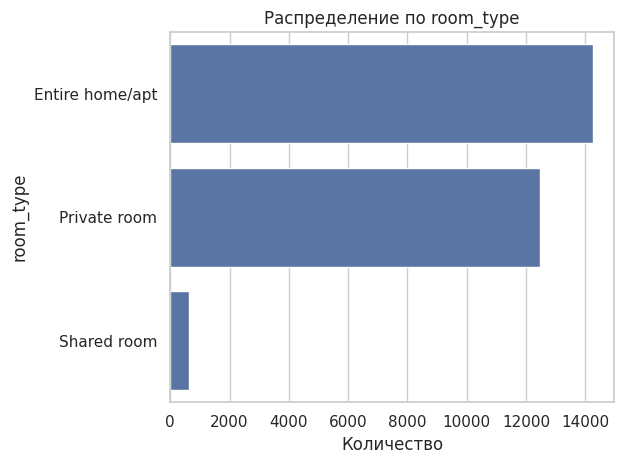


* Распределение в neighbourhood_group:
neighbourhood_group
Manhattan        12129
Brooklyn         11255
Queens            3190
Bronx              604
Staten Island      201
Name: count, dtype: int64


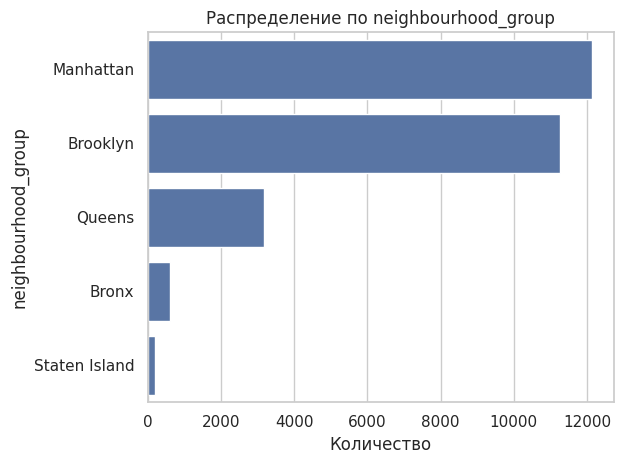


* Распределение в neighbourhood:
neighbourhood
Williamsburg          2146
Bedford-Stuyvesant    2066
Harlem                1449
Bushwick              1387
Upper West Side       1104
                      ... 
Spuyten Duyvil           1
Prince's Bay             1
Woodrow                  1
New Dorp                 1
Lighthouse Hill          1
Name: count, Length: 215, dtype: int64


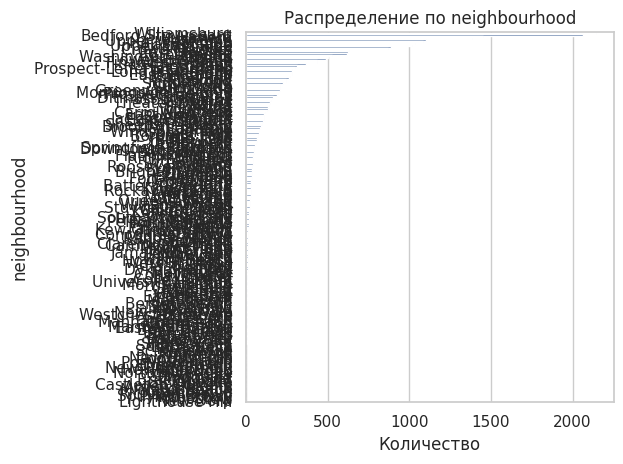

In [ ]:
for feature in ['room_type', 'neighbourhood_group', 'neighbourhood']:
    print(f"\n* Распределение в {feature}:")
    print(df[feature].value_counts())

    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f"Распределение по {feature}")
    plt.xlabel("Количество")
    plt.tight_layout()
    plt.show()


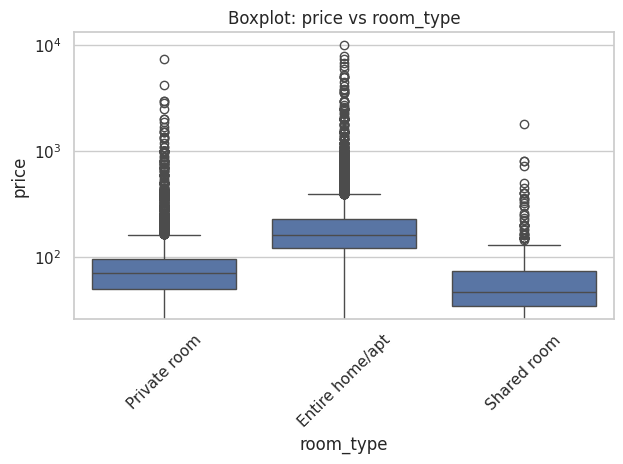

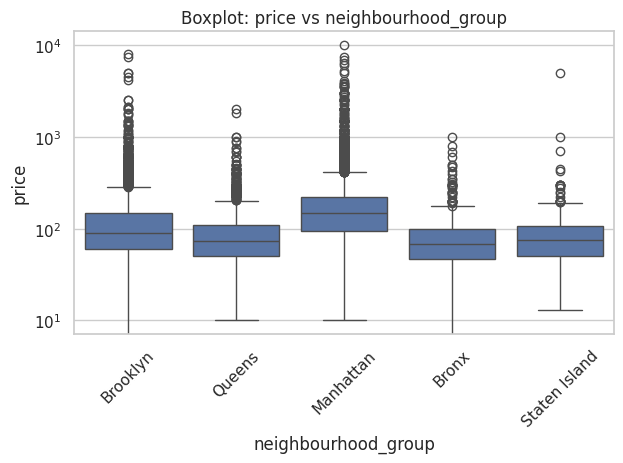

In [ ]:
for feature in ['room_type', 'neighbourhood_group']:
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f"Boxplot: price vs {feature}")
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 2.7 Геоанализ

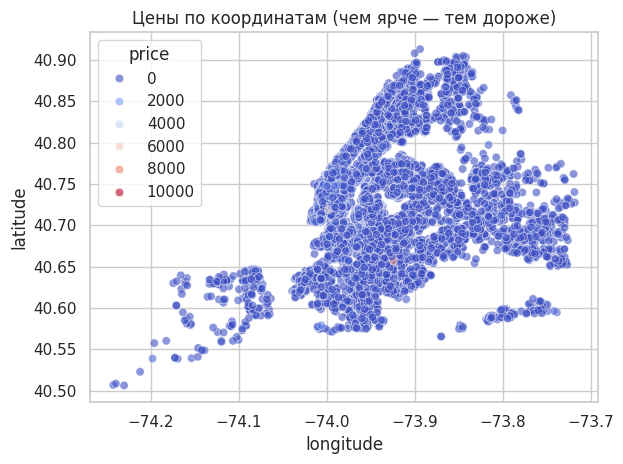

In [ ]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price', palette='coolwarm', alpha=0.6)
plt.title("Цены по координатам (чем ярче — тем дороже)")
plt.tight_layout()
plt.show()


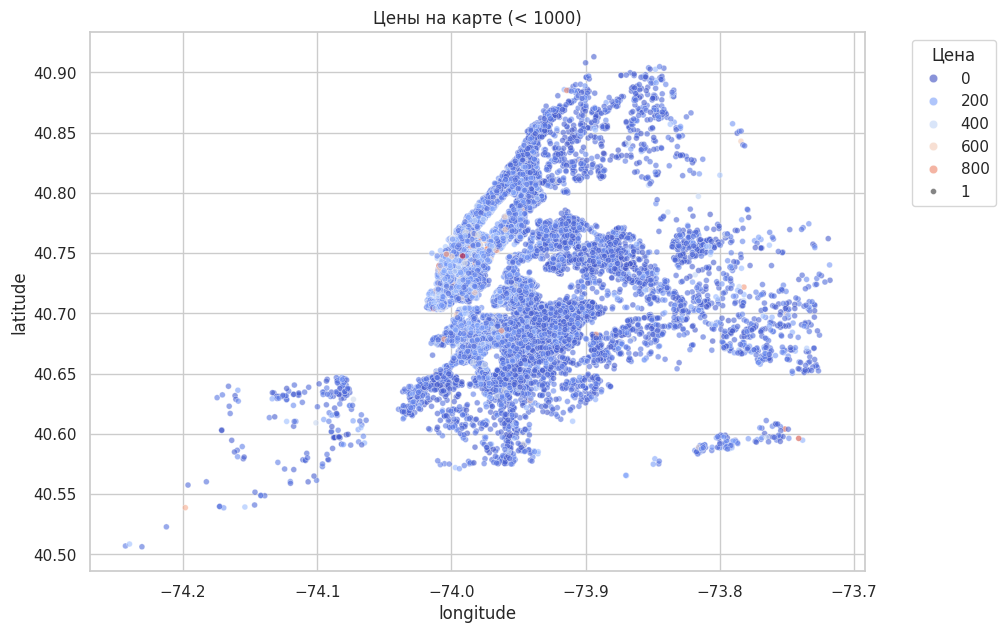

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df[df['price'] < 1000],
    x='longitude', y='latitude',
    hue='price', palette='coolwarm',
    alpha=0.6, size=1, legend='brief'
)
plt.title('Цены на карте (< 1000)')
plt.legend(title='Цена', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# 2.8 Расширенные boxplot’ы по числовым признакам

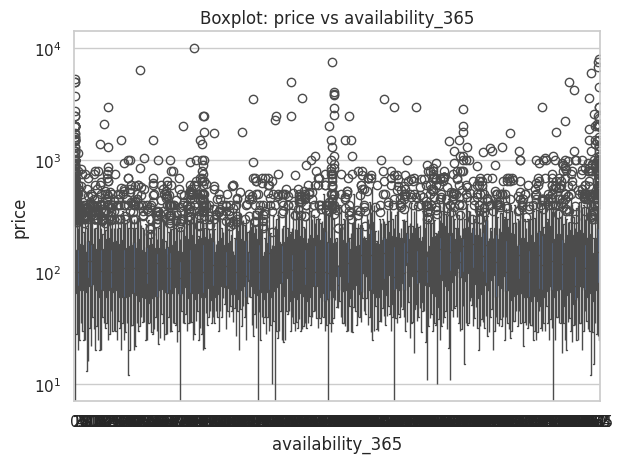

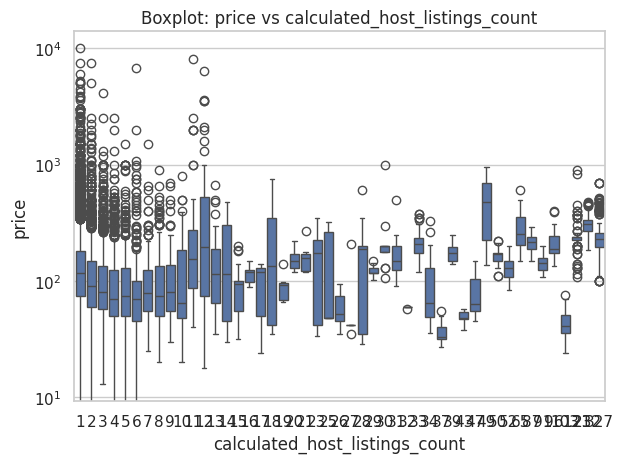

In [ ]:
features_to_boxplot = ['availability_365', 'calculated_host_listings_count']
for feature in features_to_boxplot:
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f"Boxplot: price vs {feature}")
    plt.yscale('log')
    plt.tight_layout()
    plt.show()


# 2.9 Boxplot по цене < 1000

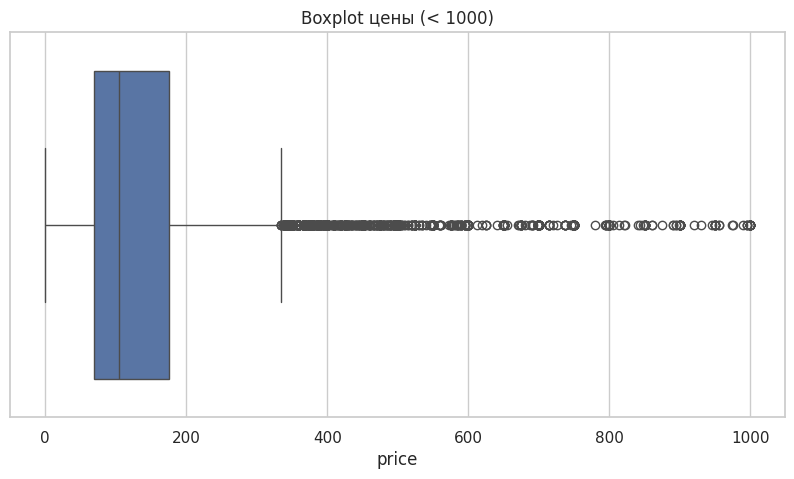

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df['price'] < 1000], x='price')
plt.title('Boxplot цены (< 1000)')
plt.show()


# 2.10 ТОП-10 районов по цене

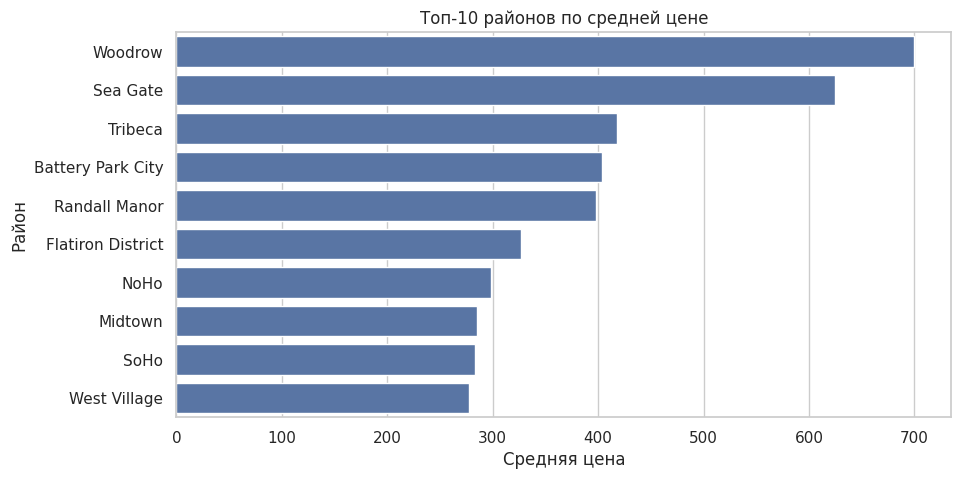

In [ ]:
top10_neigh = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top10_neigh.values, y=top10_neigh.index)
plt.title('Топ-10 районов по средней цене')
plt.xlabel('Средняя цена')
plt.ylabel('Район')
plt.show()


# 2.11 Временной анализ

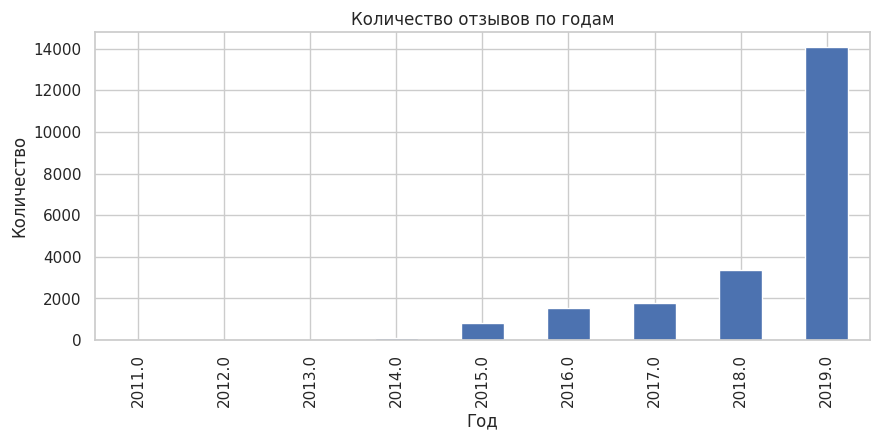

In [ ]:
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'])
    plt.figure(figsize=(10, 4))
    df['last_review'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title('Количество отзывов по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество')
    plt.show()


# 2.12 Генерация новых признаков

In [ ]:
df_copy['is_available_all_year'] = (df_copy['availability_365'] == 365).astype(int)

df_copy['days_since_last_review'] = (pd.to_datetime('today') - df_copy['last_review']).dt.days

df_copy['total_review_activity'] = df_copy['number_of_reviews'] * df_copy['reviews_per_month']

print("\nПримеры новых признаков:")
print(df_copy[['is_available_all_year', 'days_since_last_review', 'total_review_activity']].head())



Примеры новых признаков:
   is_available_all_year  days_since_last_review  total_review_activity
0                      0                  2653.0                   0.10
1                      0                  3012.0                   0.68
2                      0                  2389.0                 471.24
3                      0                  2379.0                 534.85
4                      0                  2369.0                 388.08


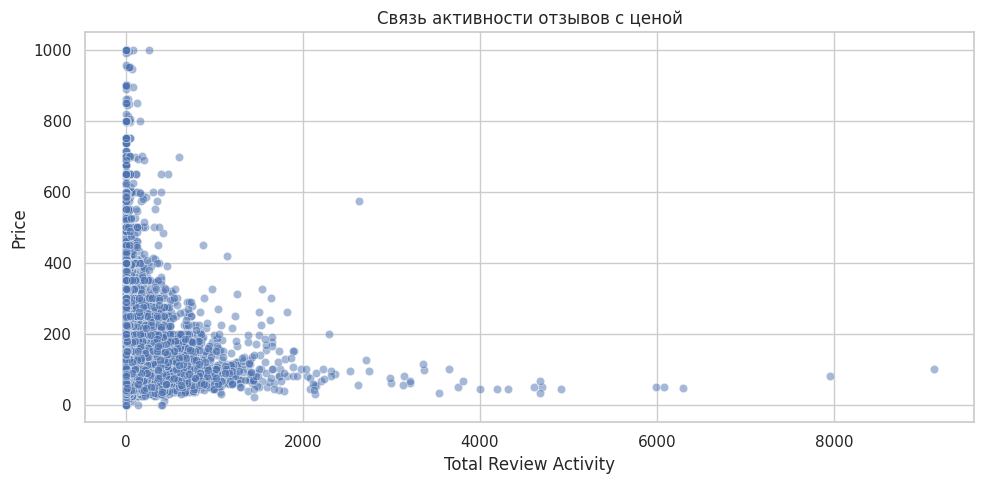

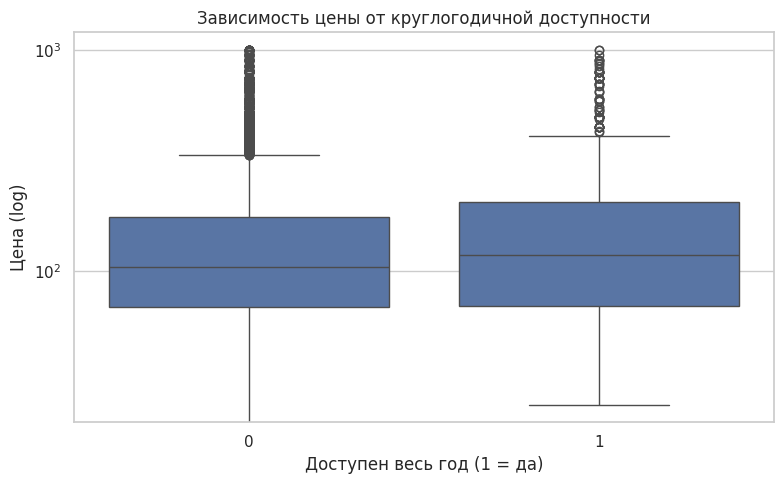

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_copy[df_copy['price'] < 1000],
                x='total_review_activity', y='price',
                alpha=0.5)
plt.title("Связь активности отзывов с ценой")
plt.xlabel("Total Review Activity")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_copy[df_copy['price'] < 1000],
            x='is_available_all_year', y='price')
plt.yscale('log')
plt.title("Зависимость цены от круглогодичной доступности")
plt.xlabel("Доступен весь год (1 = да)")
plt.ylabel("Цена (log)")
plt.tight_layout()
plt.show()


Обоснование признаков:

1. total_review_activity:
Объединяет 'number_of_reviews' и 'reviews_per_month' — позволяет учесть как общее число отзывов, так и регулярность.
Это может быть показателем популярности жилья, что связано с ценой.

2. days_since_last_review:
Показывает, насколько давно была последняя оценка с жилья.
Часто оцененные и популярные объекты — вероятно, более актуальны и дороже.

3. is_available_all_year:
Бинарный индикатор, работает ли жильё круглый год.
Долгосрочная доступность может указывать на опытного владельца, с возможной более высокой ценой.

📈 Корреляции признаков с log_price:
log_price                         1.000000
calculated_host_listings_count    0.136615
availability_365                  0.101281
latitude                          0.080488
is_available_all_year             0.050737
minimum_nights                    0.032645
days_since_last_review            0.001489
reviews_per_month                -0.039956
number_of_reviews                -0.043407
total_review_activity            -0.048472
longitude                        -0.327497
Name: log_price, dtype: float64


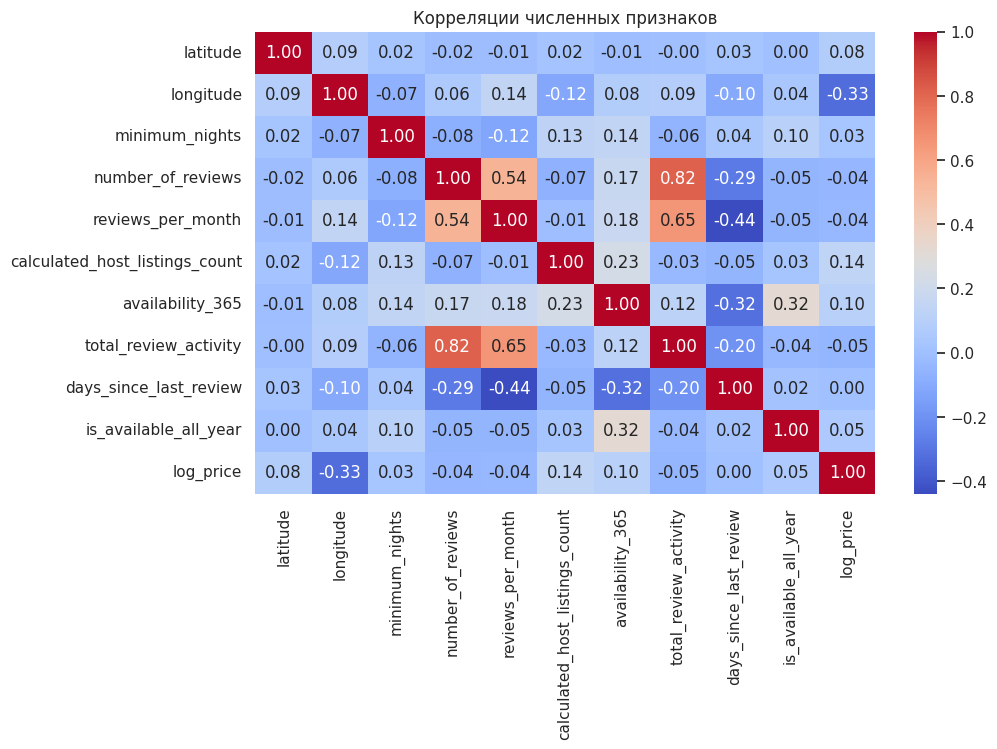

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Только численные признаки + лог-таргет
corr_features = numerical_features + ['log_price']

# Корреляции
corr_matrix = df_model[corr_features].corr()

# Сортировка по таргету
corr_target = corr_matrix['log_price'].sort_values(ascending=False)

print("📈 Корреляции признаков с log_price:")
print(corr_target)

# Тепловая карта
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляции численных признаков")
plt.show()


Вывод:
1. Признаки 'longitude', 'calculated_host_listings_count' и 'availability_365' демонстрируют наибольшую по модулю корреляцию с логарифмом цены. Особенно 'longitude' с заметной отрицательной корреляцией (около -0.33), что может быть связано с географическим расположением.

2. Новые признаки 'total_review_activity', 'is_available_all_year' и 'days_since_last_review' имеют хоть и слабую корреляцию с логарифмом цены, но сохраняются в модели благодаря логическому смыслу и потенциальной информативности.

3. Остальные признаки, такие как 'minimum_nights', 'number_of_reviews', 'reviews_per_month', показывают низкую корреляцию, однако могут давать сигнал о цене за счёт взаимодействия между собой.

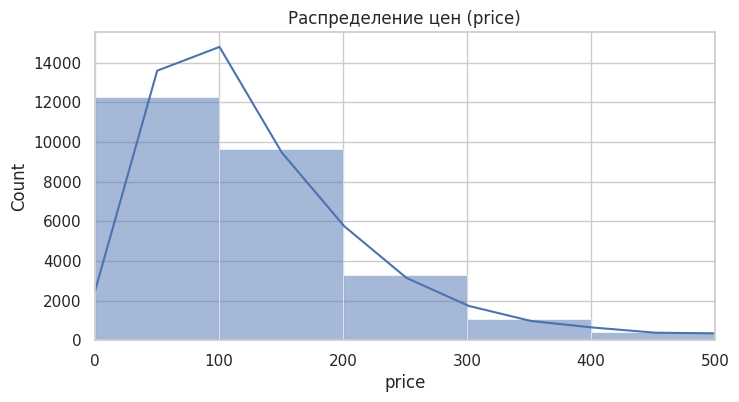

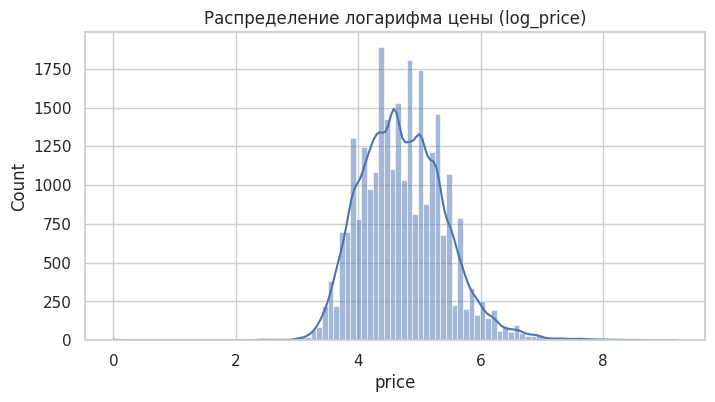

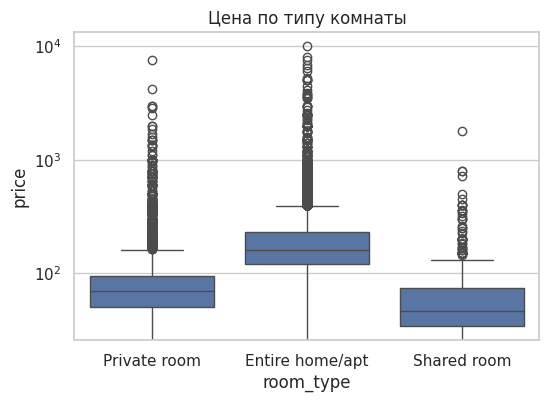

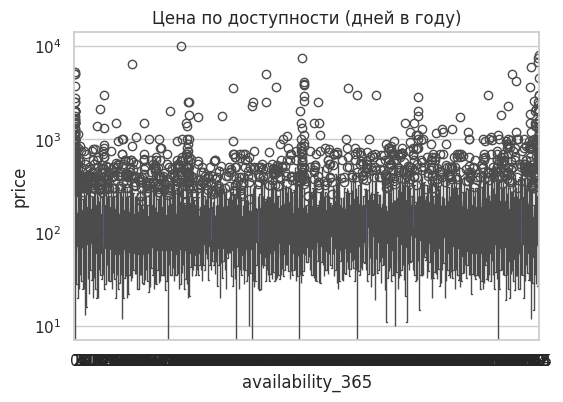

In [80]:
# 📊 Распределение цен
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Распределение цен (price)")
plt.xlim(0, 500)
plt.show()

# 📊 После логарифмирования
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['price']), bins=100, kde=True)
plt.title("Распределение логарифма цены (log_price)")
plt.show()

# 📉 Зависимость цены от room_type
plt.figure(figsize=(6,4))
sns.boxplot(x='room_type', y='price', data=df)
plt.yscale("log")
plt.title("Цена по типу комнаты")
plt.show()

# 📉 Зависимость цены от наличия 365 дней
plt.figure(figsize=(6,4))
sns.boxplot(x='availability_365', y='price', data=df)
plt.yscale("log")
plt.title("Цена по доступности (дней в году)")
plt.show()


# датасет с EDA-фичами

In [ ]:
# ✅ Сохраняем датасет с EDA-фичами
df_ready = df.copy()
df_ready['total_review_activity'] = df_ready['number_of_reviews'] * df_ready['reviews_per_month']
df_ready['days_since_last_review'] = (pd.to_datetime("2025-12-01") - df_ready['last_review']).dt.days
df_ready['is_available_all_year'] = (df_ready['availability_365'] == 365).astype(int)

# Удаляем лишние
df_ready = df_ready.drop(columns=['name', 'host_name', 'host_id'], errors='ignore')

# Сохраняем в файл
df_ready.to_csv("data_with_features.csv", index=False)
print("✅ Датасет сохранён в файл: data_with_features.csv")


✅ Датасет сохранён в файл: data_with_features.csv


# **3 Модели**

# 3.1 Разделение данных: обоснование и реализация

In [ ]:
from sklearn.model_selection import train_test_split

cols_to_drop = ['id', 'name', 'host_name', 'host_id', 'last_review']
df_model = df.copy().drop(columns=cols_to_drop)

target = 'price'
X = df_model.drop(columns=[target])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")


Обучающая выборка: (21903, 10)
Тестовая выборка: (5476, 10)


# 3.2 LightAutoML (пробный)

In [ ]:
pip install lightautoml


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.5/412.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.1/216.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.6 MB/s eta 0:00:00
  Created wheel for json2html: filename=json2html-1.3.0-py3-none-any.whl size=7591 sha256=655ae88e6b0d2e82b861caffafd48e99c3d20edc0dfc022d970d56b86af7cce2
  Stored in

In [ ]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.metrics import mean_absolute_error
import time


/usr/local/lib/python3.12/dist-packages/lightautoml/transformers/text.py:23: UserWarning: 'fasttext' - package isn't installed
  warnings.warn("'fasttext' - package isn't installed")


In [ ]:
task = Task('reg')

train_data = X_train.copy()
train_data['price'] = y_train

automl = TabularAutoML(task=task, timeout=600, cpu_limit=4, reader_params={"n_jobs": 4})

start_time = time.time()
oof_pred = automl.fit_predict(train_data, roles={'target': 'price'})
end_time = time.time()

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (21903, 11)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 589.81 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [0, 2], 'embed_sizes': array([47, 11], dtype=int32), 'data_size': 22}
INFO2:lightautom

In [ ]:
test_data = X_test.copy()
test_pred = automl.predict(test_data)

mae = mean_absolute_error(y_test, test_pred.data)
print(f"MAE: {mae:.2f}")

MAE: 63.42


# Кастом бэйзлайн LightAutoMl 1

In [ ]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from lightautoml.dataset.roles import DatetimeRole

df_filtered = df_copy[df_copy['price'] < 1000].copy()

df_filtered['log_price'] = np.log1p(df_filtered['price'])

target = 'log_price'

drop_cols = ['id', 'name', 'host_name', 'host_id', 'last_review', 'price']
df_filtered_model = df_filtered.drop(columns=drop_cols)

task = Task('reg')

roles = {
    'target': target,
    'datetime': 'last_review' if 'last_review' in df.columns else None,
    'drop': ['neighbourhood']
}

roles = {k: v for k, v in roles.items() if v is not None}

automl_fast_custom = TabularAutoML(
    task=task,
    timeout=900,
    cpu_limit=4,
    reader_params={'n_jobs': 4},
    general_params={'use_algos': [['lgb', 'linear']]}
)

train_data = df_filtered_model.copy()

start = time.time()
oof_pred = automl_fast_custom.fit_predict(train_data, roles=roles)

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 900.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (27219, 14)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 898.87 secs
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 0.276829
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 0.269679
INFO3:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 0.268145
INFO3:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 0.266945
INFO3:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 0.26

In [ ]:
df_comp = pd.read_csv('compSP25.csv')

print(df_comp.shape)
df_comp.head()


(6847, 15)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Creative Vintage Loft in S. Williamsburg,806774,Ali & SweetPea,Brooklyn,Williamsburg,40.70667,-73.96524,Entire home/apt,2,86,5/16/2019,0.89,2,15
1,2,"2 beds in nice rooms, JFK&LGA 15 minutes",101657794,Dr. Shirin,Queens,Briarwood,40.70988,-73.80691,Private room,2,38,6/16/2019,1.53,6,365
2,3,1 Bedroom Apartment Near ESB,211549023,Studioplus,Manhattan,Midtown,40.74747,-73.98668,Entire home/apt,2,7,6/13/2019,0.84,13,276
3,4,Cozy Groundfloor Apartment w/Garden,22169347,Laura,Brooklyn,Crown Heights,40.67580,-73.95578,Entire home/apt,4,6,8/27/2018,0.16,1,0
4,5,Noho High Rise w/ Private Terrace,221071115,Ty,Manhattan,Greenwich Village,40.72836,-73.99925,Entire home/apt,7,0,NaN,NaN,1,80


In [ ]:
df_comp = df_comp.copy()
df_comp['is_available_all_year'] = (df_comp['availability_365'] == 365).astype(int)

df_comp['last_review'] = pd.to_datetime(df_comp['last_review'], errors='coerce')

df_comp['days_since_last_review'] = (pd.to_datetime('2025-01-01') - df_comp['last_review']).dt.days
df_comp['days_since_last_review'] = df_comp['days_since_last_review'].fillna(df_comp['days_since_last_review'].median())

df_comp['total_review_activity'] = df_comp['reviews_per_month'] * df_comp['number_of_reviews']
df_comp['total_review_activity'] = df_comp['total_review_activity'].fillna(0)
df_comp_model = df_comp.drop(columns=['id', 'name', 'host_name', 'host_id', 'last_review'])

preds = automl_fast_custom.predict(df_comp_model).data.ravel()

final_preds = np.expm1(preds)

submission_fast = pd.DataFrame({
    'id': df_comp['id'],
    'price': final_preds
})

submission_fast.to_csv('Kaggle_submission_custom_fast_lama.csv', index=False)

# Кастом бэйзлайн LightAutoMl 2

In [ ]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

task = Task('reg')

df_train_full = df.copy()
df_train_full['log_price'] = np.log1p(df_train_full['price'])

df_train_model = df_train_full.drop(columns=['id', 'name', 'host_name', 'price', 'host_id', 'last_review'])

automl_full = TabularAutoML(task=task, timeout=600, cpu_limit=2, reader_params={'target': 'log_price'})
oof_preds_full = automl_full.fit_predict(df_train_model, roles={'target': 'log_price'})



INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 2 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (27379, 11)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 598.93 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [0, 2], 'embed_sizes': array([47, 11], dtype=int32), 'data_size': 22}
INFO2:lightautom

In [ ]:
log_preds = oof_preds_full.data.ravel()
true_prices = df_train_full['price']
price_preds = np.expm1(log_preds)

mae = mean_absolute_error(true_prices, price_preds)
rmse = mean_squared_error(true_prices, price_preds) ** 0.5
r2 = r2_score(true_prices, price_preds)

print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")


MAE  = 57.63
RMSE = 203.33
R²   = 0.1442


In [ ]:

df_comp_base = df_comp.copy()
df_comp_model = df_comp_base.copy()
df_comp_model['total_review_activity'] = df_comp_model['number_of_reviews'] * df_comp_model['reviews_per_month']
df_comp_model['days_since_last_review'] = (pd.to_datetime("2025-12-01") - df_comp_model['last_review']).dt.days
df_comp_model['is_available_all_year'] = (df_comp_model['availability_365'] == 365).astype(int)
df_comp_model = df_comp_model.drop(columns=['id', 'name', 'host_name', 'host_id', 'last_review'], errors='ignore')

test_log_preds = automl_full.predict(df_comp_model).data.ravel()
test_preds = np.expm1(test_log_preds)

submission_full = pd.DataFrame({
    'id': df_comp_base['id'],
    'price': test_preds
})

submission_full.to_csv('Kaggle_submission_full_lama.csv', index=False)

# Свои решения

In [ ]:
df_model = df_ready.copy()

# 🧠 Признаки, основанные на здравом смысле и корреляции
# - 'is_available_all_year': логичный бинарный флаг (1 - доступен круглый год)
# - 'days_since_last_review': логичный временной показатель
# - 'total_review_activity': оценка общей активности (частота × количество)

df_model['log_price'] = np.log1p(df_model['price'])

df_model['last_review'] = pd.to_datetime(df_model['last_review'], errors='coerce')

df_model['is_available_all_year'] = (df_model['availability_365'] == 365).astype(int)

df_model['days_since_last_review'] = (
    pd.to_datetime("2025-12-01") - df_model['last_review']
).dt.days.fillna(df_model['days_since_last_review'].median())

df_model['total_review_activity'] = (
    df_model['number_of_reviews'] * df_model['reviews_per_month']
).fillna(0)


In [ ]:
df_model = df.copy()

df_model['log_price'] = np.log1p(df_model['price'])

df_model['last_review'] = pd.to_datetime(df_model['last_review'], errors='coerce')

df_model['is_available_all_year'] = (df_model['availability_365'] == 365).astype(int)

df_model['days_since_last_review'] = (
    pd.to_datetime("2025-12-01") - df_model['last_review']
).dt.days.fillna(0)

df_model['total_review_activity'] = (
    df_model['number_of_reviews'] * df_model['reviews_per_month']
).fillna(0)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
numerical_features = [
    'latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
    'is_available_all_year', 'days_since_last_review', 'total_review_activity'
]

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)
])


# Pipeline #1: Random Forest

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_model = pd.read_csv("data_with_features.csv")

df_model['log_price'] = np.log1p(df_model['price'])

categorical_features = ['room_type', 'neighbourhood_group', 'neighbourhood']
numerical_features = [
    'latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
    'total_review_activity', 'days_since_last_review', 'is_available_all_year'
]

features = categorical_features + numerical_features
target = 'log_price'

train_data, test_data = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42
)

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


In [59]:
import optuna
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'random_state': 42,
        'n_jobs': -1
    }

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(**params))
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, preds) ** 0.5
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

print(study.best_params)

INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-9616271a-d773-46bd-83d3-3927726ddb33
INFO:optuna.study.study:Trial 0 finished with value: 0.4211497608489278 and parameters: {'n_estimators': 130, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.4211497608489278.
INFO:optuna.study.study:Trial 1 finished with value: 0.4503116987481371 and parameters: {'n_estimators': 181, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.4211497608489278.
INFO:optuna.study.study:Trial 2 finished with value: 0.41994452139218735 and parameters: {'n_estimators': 219, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.41994452139218735.
INFO:optuna.study.study:Trial 3 finished with value: 0.43016030716469805 and parameters: {'n_estimators': 264, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 2 with value: 0.419944

🏆 Лучшие параметры:
{'n_estimators': 219, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 4}


In [60]:
best_rf = RandomForestRegressor(**study.best_params, random_state=42, n_jobs=-1)

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_rf)
])

rf_pipeline.fit(X_train, y_train)

log_preds = rf_pipeline.predict(X_test)
preds = np.expm1(log_preds)
true_prices = np.expm1(y_test)

In [61]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(true_prices, preds)
rmse = mean_squared_error(true_prices, preds) ** 0.5
r2 = r2_score(true_prices, preds)

print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")

MAE  = 52.61
RMSE = 154.78
R²   = 0.2407


In [62]:
df_submit = df_comp.copy()

df_submit['total_review_activity'] = (
    df_submit['number_of_reviews'] * df_submit['reviews_per_month']
).fillna(0)

df_submit['days_since_last_review'] = (
    pd.to_datetime("2025-12-01") - pd.to_datetime(df_submit['last_review'], errors='coerce')
).dt.days.fillna(df_model['days_since_last_review'].median())

df_submit['is_available_all_year'] = (df_submit['availability_365'] == 365).astype(int)

X_submit = df_submit[features]

rf_preds = np.expm1(rf_pipeline.predict(X_submit))

submission_rf = pd.DataFrame({
    'id': df_submit['id'],
    'price': rf_preds
})

submission_rf.to_csv("kaggle_submission_random_forest_hpo.csv", index=False)


# Pipeline #2: LightGBM Pipeline

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_model = pd.read_csv("data_with_features.csv")

df_model['log_price'] = np.log1p(df_model['price'])

categorical_features = ['room_type', 'neighbourhood_group', 'neighbourhood']
numerical_features = [
    'latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
    'total_review_activity', 'days_since_last_review', 'is_available_all_year'
]

features = categorical_features + numerical_features
target = 'log_price'

train_data, test_data = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42
)

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


In [70]:
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'random_state': 42,
        'n_jobs': -1
    }

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', lgb.LGBMRegressor(**params))
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, preds) ** 0.5
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

print(study.best_params)

INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-a898c30e-4693-46d3-a7ef-b17af6f0fbbd
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
INFO:optuna.study.study:Trial 0 finished with value: 0.42331154683331584 and parameters: {'max_depth': 4, 'learning_rate': 0.18805067047580112, 'n_estimators': 924, 'num_leaves': 290, 'min_child_samples': 67}. Best is trial 0 with value: 0.42331154683331584.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
INFO:optuna.study.study:Trial 1 finished with value: 0.4329593577359558 and parameters: {'max_depth': 8, 'learning_rate': 0.15826532806647797, 'n_estimators': 905, 'num_leaves': 209, 'min_child_samples': 64}. Best is trial 0 with value: 0.423311

🏆 Лучшие параметры:
{'max_depth': 4, 'learning_rate': 0.2178236639314073, 'n_estimators': 706, 'num_leaves': 144, 'min_child_samples': 53}


In [71]:
from sklearn.metrics import mean_absolute_error, r2_score

best_lgb = lgb.LGBMRegressor(**study.best_params)

lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_lgb)
])

lgb_pipeline.fit(X_train, y_train)

log_preds = lgb_pipeline.predict(X_test)
preds = np.expm1(log_preds)
true_prices = np.expm1(y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [72]:
mae = mean_absolute_error(true_prices, preds)
rmse = mean_squared_error(true_prices, preds) ** 0.5
r2 = r2_score(true_prices, preds)

print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")

MAE  = 52.94
RMSE = 153.66
R²   = 0.2516


In [73]:
df_submit = df_comp.copy()

df_submit['total_review_activity'] = (
    df_submit['number_of_reviews'] * df_submit['reviews_per_month']
).fillna(0)

df_submit['days_since_last_review'] = (
    pd.to_datetime("2025-12-01") - pd.to_datetime(df_submit['last_review'], errors='coerce')
).dt.days.fillna(df_model['days_since_last_review'].median())

df_submit['is_available_all_year'] = (df_submit['availability_365'] == 365).astype(int)

X_submit = df_submit[features]
lgb_preds = np.expm1(lgb_pipeline.predict(X_submit))

submission_lgbm = pd.DataFrame({
    'id': df_submit['id'],
    'price': lgb_preds
})

submission_lgbm.to_csv("kaggle_submission_lgbm_hpo.csv", index=False)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


# Pipeline #3: Catboost

In [ ]:
!pip install catboost


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_model = pd.read_csv("data_with_features.csv")

df_model['log_price'] = np.log1p(df_model['price'])

categorical_features = ['room_type', 'neighbourhood_group', 'neighbourhood']
numerical_features = [
    'latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
    'total_review_activity', 'days_since_last_review', 'is_available_all_year'
]

features = categorical_features + numerical_features
target = 'log_price'

train_data, test_data = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42
)

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


In [75]:
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error

cat_features_indices = [features.index(col) for col in categorical_features]

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 200, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'random_seed': 42,
        'verbose': 0
    }

    train_pool = Pool(X_train, y_train, cat_features=cat_features_indices)
    test_pool = Pool(X_test, y_test, cat_features=cat_features_indices)

    model = CatBoostRegressor(**params)
    model.fit(train_pool)

    preds = model.predict(test_pool)
    rmse = mean_squared_error(y_test, preds) ** 0.5
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)

print(study.best_params)

INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-67ad5bf6-2f09-4e15-827f-f7ca2dfd8086
INFO:optuna.study.study:Trial 0 finished with value: 0.41731442178723144 and parameters: {'iterations': 545, 'depth': 7, 'learning_rate': 0.20670089900511188, 'l2_leaf_reg': 4.183262194698382}. Best is trial 0 with value: 0.41731442178723144.
INFO:optuna.study.study:Trial 1 finished with value: 0.41877446645186506 and parameters: {'iterations': 504, 'depth': 5, 'learning_rate': 0.0626520268159973, 'l2_leaf_reg': 6.092486321373496}. Best is trial 0 with value: 0.41731442178723144.
INFO:optuna.study.study:Trial 2 finished with value: 0.42663481621263816 and parameters: {'iterations': 680, 'depth': 9, 'learning_rate': 0.22947580287060204, 'l2_leaf_reg': 6.175860392282642}. Best is trial 0 with value: 0.41731442178723144.
INFO:optuna.study.study:Trial 3 finished with value: 0.4217449777630357 and parameters: {'iterations': 899, 'depth': 10, 'learning_rate': 0.16833005067698

🏆 Лучшие параметры:
{'iterations': 403, 'depth': 7, 'learning_rate': 0.061556170830284494, 'l2_leaf_reg': 1.973919913511836}


In [76]:
from sklearn.metrics import mean_absolute_error, r2_score
from catboost import Pool

best_cat = CatBoostRegressor(
    **study.best_params,
    random_seed=42,
    verbose=0
)

train_pool = Pool(X_train, y_train, cat_features=cat_features_indices)
test_pool = Pool(X_test, y_test, cat_features=cat_features_indices)

best_cat.fit(train_pool)
log_preds = best_cat.predict(test_pool)

preds = np.expm1(log_preds)
true_prices = np.expm1(y_test)

In [77]:

mae = mean_absolute_error(true_prices, preds)
rmse = mean_squared_error(true_prices, preds) ** 0.5
r2 = r2_score(true_prices, preds)

print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")

MAE  = 52.37
RMSE = 154.16
R²   = 0.2468


In [ ]:
df_submit = df_comp.copy()

df_submit['total_review_activity'] = (
    df_submit['number_of_reviews'] * df_submit['reviews_per_month']
).fillna(0)

df_submit['days_since_last_review'] = (
    pd.to_datetime("2025-12-01") - pd.to_datetime(df_submit['last_review'], errors='coerce')
).dt.days.fillna(df_model['days_since_last_review'].median())

df_submit['is_available_all_year'] = (df_submit['availability_365'] == 365).astype(int)

X_submit = df_submit[features]
X_submit_pool = Pool(X_submit, cat_features=cat_features_indices)

cat_preds = np.expm1(best_cat.predict(X_submit_pool))

submission_cat = pd.DataFrame({
    'id': df_submit['id'],
    'price': cat_preds
})

submission_cat.to_csv("kaggle_submission_catboost_hpo.csv", index=False)
